In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:

train_data.dropna(subset=['Age', 'Embarked'], inplace=True)
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\swarm\AppData\Local\Temp\ipykernel_21432\353867703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette=['skyblue', 'lightcoral'])


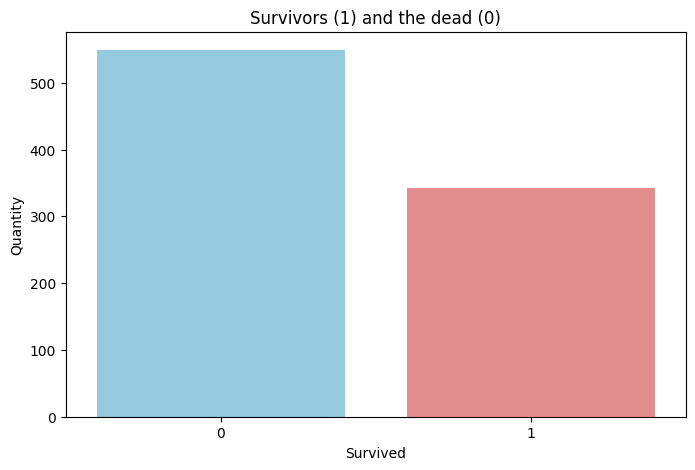

In [5]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

plt.figure(figsize=(8, 5))

sns.countplot(x='Survived', data=train_data, palette=['skyblue', 'lightcoral'])
plt.title('Survivors (1) and the dead (0)')
plt.xlabel('Survived')
plt.ylabel('Quantity')

plt.show()

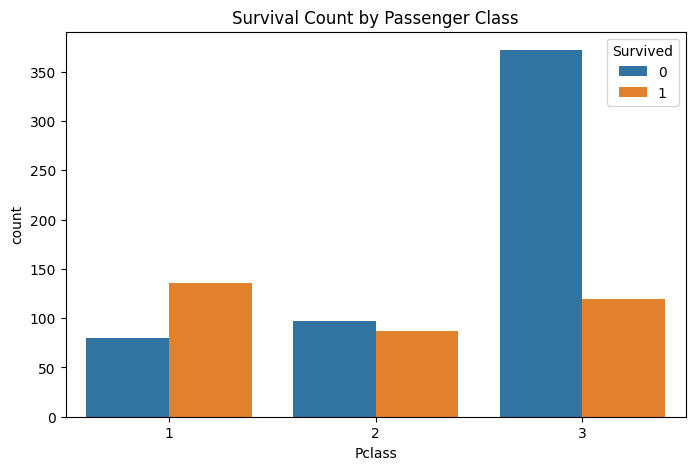

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

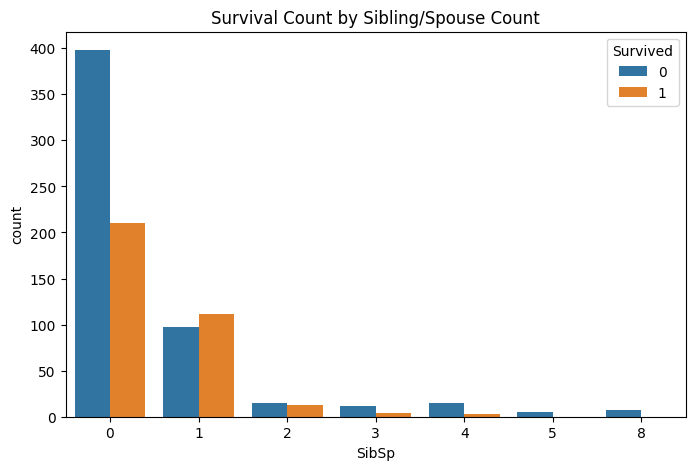

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('Survival Count by Sibling/Spouse Count')
plt.show()

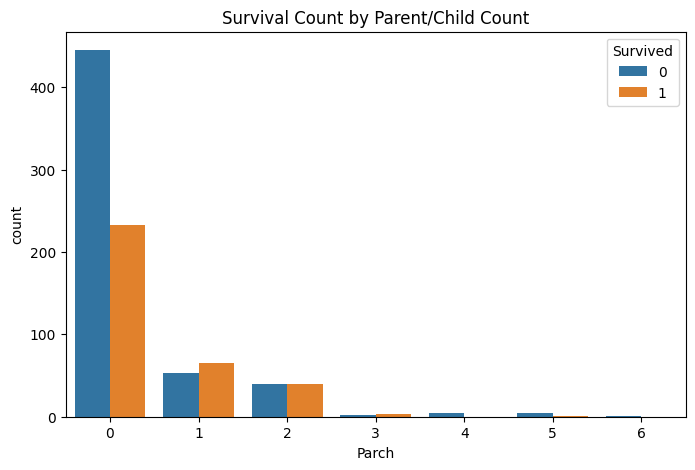

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Survival Count by Parent/Child Count')
plt.show()

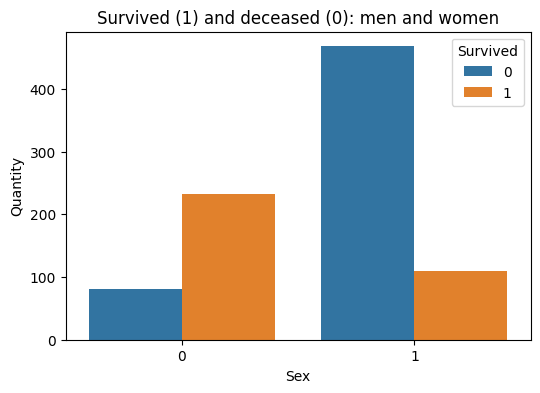

In [9]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

f, ax = plt.subplots(figsize=(6, 4))

sns.countplot(x='Sex', hue='Survived', data=train_data, ax=ax)
ax.set_ylabel('Quantity')
ax.set_title('Survived (1) and deceased (0): men and women')

plt.show()

In [22]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [33]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [31]:
print("Column names:", train_data.columns)

train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

X = pd.get_dummies(train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked']], columns=['Sex', 'Embarked'])

y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Column names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Accuracy: 0.7752808988764045
Confusion Matrix:
[[84 25]
 [15 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [88]:
data = {"Pclass": 2, "Age":11, "SibSp": 2, "Parch": 1, "Sex": 0, "Embarked": 1}

sample_data = pd.DataFrame(
    {
        "Pclass": [data["Pclass"]],
        "Age": [data["Age"]],
        "SibSp": [data["SibSp"]],
        "Parch": [data["Parch"]],
        "Sex_0": [0],  
        "Sex_1": [data["Sex"]],  
        "Embarked_C": [0],  
        "Embarked_Q": [0],  
        "Embarked_S": [1],  
    }
)

predict = model.predict(sample_data)
if predict == 1:
    print("Person Survived")
else:
    print("They did not survive")


Person Survived
